In [1]:
#pip install yfinance

In [3]:
import pandas as pd
from pathlib import Path

In [19]:
import yfinance as yf


In [20]:
DATA_RAW = Path("datas/raw"); DATA_RAW.mkdir(parents=True, exist_ok=True)
DATA_PROC = Path("datas/processed"); DATA_PROC.mkdir(parents=True, exist_ok=True)

In [21]:
ticker= "^GSPC"
start = "1928-01-01"
end= None

In [22]:
sp500 = yf.download(ticker, start=start, end=end, progress=False)

C:\Users\efede\AppData\Local\Temp\ipykernel_31656\2024348187.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download(ticker, start=start, end=end, progress=False)


In [23]:
sp500.head()
sp500.tail()

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2025-10-23,6738.439941,6749.529785,6700.140137,6703.649902,5565750000
2025-10-24,6791.689941,6807.109863,6772.069824,6772.069824,5058220000
2025-10-27,6875.160156,6877.279785,6843.939941,6845.459961,5290650000
2025-10-28,6890.890137,6911.299805,6870.729980,6897.740234,5695930000
2025-10-29,6890.589844,6920.339844,6851.910156,6910.950195,6280130000


In [24]:
daily_path = DATA_RAW / "sp500_yahoo_daily.csv"
sp500.to_csv(daily_path, index=True)
print(f">> Daily raw data has been saved: {daily_path}")


>> Daily raw data has been saved: datas\raw\sp500_yahoo_daily.csv


In [25]:
sp500_close = sp500["Close"]["^GSPC"]

In [72]:
sp500_close.head()
type(sp500_close)

pandas.core.series.Series

In [ ]:
sp500_close = sp500_close.to_frame()


In [76]:
type(sp500_close)
sp500_close.columns = ['Close']
sp500_close.head()

,Close
Date,
1928-01-03,17.760000
1928-01-04,17.719999
1928-01-05,17.549999
1928-01-06,17.660000
1928-01-09,17.500000


In [78]:
sp500_close.to_csv( r"D:\UE\CAPSTONE PROJECT\datas\datas\processed\sp500_yahoo_daily.csv", index= True)

In [30]:
sp500_monthly = sp500_close.resample("M").last().to_frame("sp500 monthly close")

C:\Users\efede\AppData\Local\Temp\ipykernel_31656\1759755832.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sp500_monthly = sp500_close.resample("M").last().to_frame("sp500 monthly close")


In [31]:
sp500_monthly.to_csv(r"D:\UE\CAPSTONE PROJECT\datas\datas\processed\sp500_yahoo_monthly.csv", index=True)
print(f">> Monthly processed data has been saved: {DATA_PROC / 'sp500_yahoo_monthly.csv'}")

>> Monthly processed data has been saved: datas\processed\sp500_yahoo_monthly.csv


SP500 PROCESSED DATA EDA 

In [32]:
sp500_monthly.info()
sp500_monthly.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1174 entries, 1928-01-31 to 2025-10-31
Freq: ME
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sp500 monthly close  1174 non-null   float64
dtypes: float64(1)
memory usage: 18.3 KB


,sp500 monthly close
count,1174.000000
mean,705.622656
std,1197.107262
min,4.430000
25%,24.815000
50%,103.150002
75%,1072.187500
max,6890.589844


In [33]:
print("\n", sp500_monthly.index.min(), "→", sp500_monthly.index.max())


 1928-01-31 00:00:00 → 2025-10-31 00:00:00


In [34]:
print("Start Date:", sp500_monthly.index.min())
print("End Date:", sp500_monthly.index.max())
print("Total Observations:", len(sp500_monthly))
print("Missing values:", sp500_monthly.isna().sum().sum())


Start Date: 1928-01-31 00:00:00
End Date: 2025-10-31 00:00:00
Total Observations: 1174
Missing values: 0


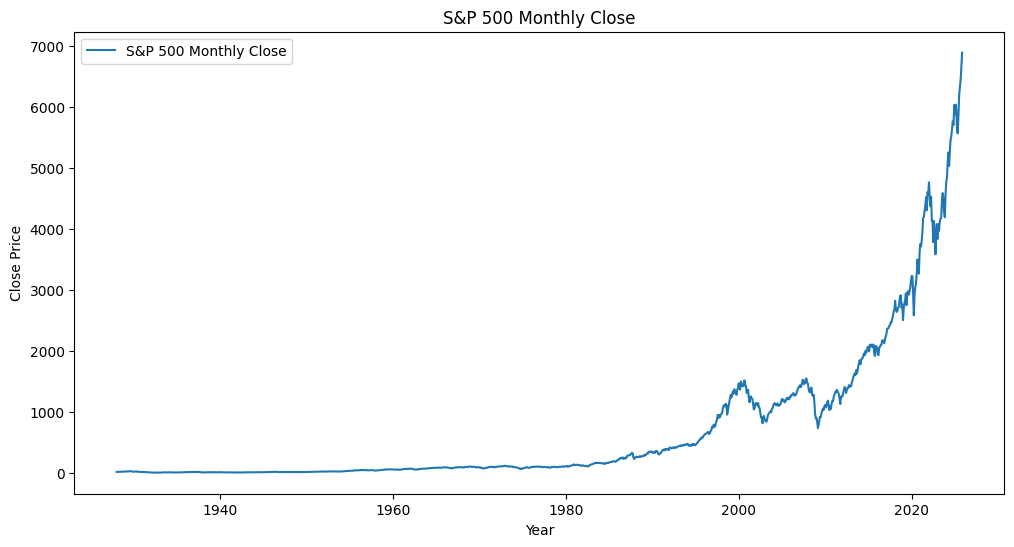

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(sp500_monthly, label="S&P 500 Monthly Close")
plt.title("S&P 500 Monthly Close")
plt.xlabel("Year")
plt.ylabel("Close Price")
plt.legend()
plt.show()

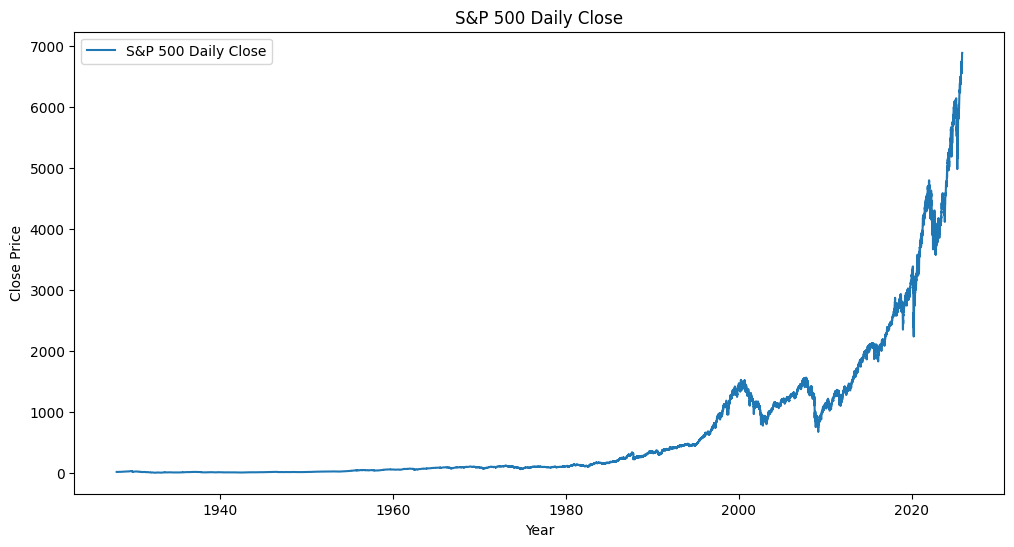

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(sp500_close, label="S&P 500 Daily Close")
plt.title("S&P 500 Daily Close")
plt.xlabel("Year")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [38]:
# Compute simple returns
sp500_monthly['Monthly Return (%)'] = sp500_monthly['sp500 monthly close'].pct_change() * 100
sp500_monthly['Yearly Return (%)'] = sp500_monthly['sp500 monthly close'].pct_change(12) * 100

sp500_monthly[['Monthly Return (%)', 'Yearly Return (%)']].describe()


,Monthly Return (%),Yearly Return (%)
count,1173.000000,1162.000000
mean,0.653467,8.067040
std,5.341743,19.988312
min,-29.942278,-70.128120
25%,-1.911766,-4.041841
50%,0.946833,9.717704
75%,3.596829,20.115597
max,39.137646,146.275401


In [39]:
print(sp500_monthly["Yearly Return (%)"])

Date
1928-01-31          NaN
1928-02-29          NaN
1928-03-31          NaN
1928-04-30          NaN
1928-05-31          NaN
                ...    
2025-06-30    13.633787
2025-07-31    14.796197
2025-08-31    14.373272
2025-09-30    16.069123
2025-10-31    20.772062
Freq: ME, Name: Yearly Return (%), Length: 1174, dtype: float64


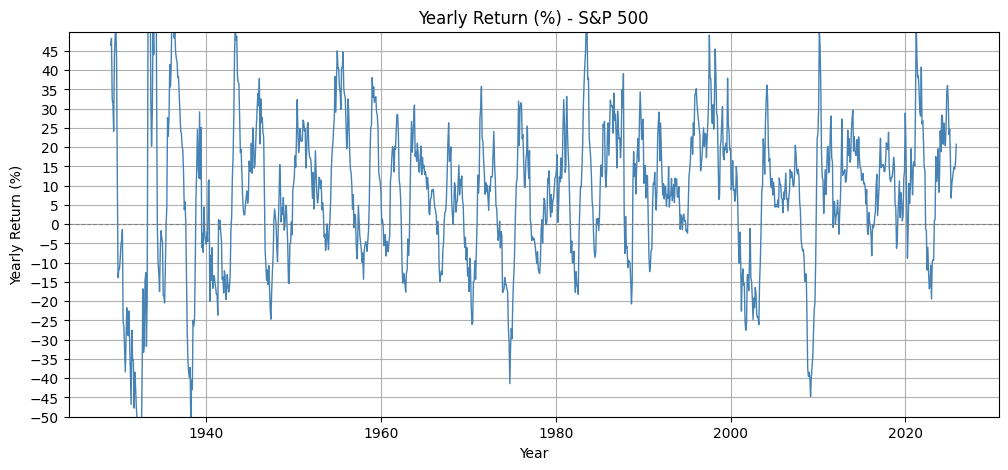

In [40]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,5))
plt.plot(sp500_monthly.index, sp500_monthly["Yearly Return (%)"], color='steelblue', linewidth=1)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.ylim(-50, 50)
plt.yticks(np.arange(-50, 50, 5))
plt.title("Yearly Return (%) - S&P 500")
plt.xlabel("Year")
plt.ylabel("Yearly Return (%)")
plt.grid(True)
plt.show()


In [41]:
ticker_djt= "^DJT"
djt= yf.download(ticker_djt, start= "1928-01-01", end=None, progress=False)

C:\Users\efede\AppData\Local\Temp\ipykernel_31656\2357196012.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  djt= yf.download(ticker_djt, start= "1928-01-01", end=None, progress=False)


In [42]:
djt_daily_path=r"D:\UE\CAPSTONE PROJECT\datas\datas\raw\djt_yahoo_daily.csv"
djt.to_csv(djt_daily_path, index=True)
print(f">> Daily raw data has been saved: {djt_daily_path}")

>> Daily raw data has been saved: D:\UE\CAPSTONE PROJECT\datas\datas\raw\djt_yahoo_daily.csv


In [43]:
djt.columns

MultiIndex([( 'Close', '^DJT'),
            (  'High', '^DJT'),
            (   'Low', '^DJT'),
            (  'Open', '^DJT'),
            ('Volume', '^DJT')],
           names=['Price', 'Ticker'])

In [53]:
djt_yahoo_daily= djt['Close', '^DJT']

In [64]:
print(djt_yahoo_daily.columns)
type(djt_yahoo_daily)


['Close_^DJT', 'High_^DJT', 'Low_^DJT', 'Open_^DJT', 'Volume_^DJT']


pandas.core.series.Series

In [ ]:
djt_yahoo_daily = djt_yahoo_daily.to_frame()

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [68]:
type(djt_yahoo_daily)

pandas.core.frame.DataFrame

In [69]:
djt_yahoo_daily.columns = ['Close']
print(djt_yahoo_daily.head())


                  Close
Date                   
1992-01-02  1342.099976
1992-01-03  1350.699951
1992-01-06  1365.500000
1992-01-07  1383.000000
1992-01-08  1380.400024


In [70]:
djt_yahoo_daily.to_csv(r"D:\UE\CAPSTONE PROJECT\datas\datas\processed\djt_yahoo_daily.csv", index=True)

In [22]:
djt_close = djt["Close"]
djt_monthly = djt_close.resample("M").last()

C:\Users\efede\AppData\Local\Temp\ipykernel_28980\4040193099.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  djt_monthly = djt_close.resample("M").last()


In [23]:
djt_monthly.to_csv(r"D:\UE\CAPSTONE PROJECT\datas\datas\processed\djt_yahoo_monthly.csv", index=True)
print("✅ DJT monthly data saved successfully!")

✅ DJT monthly data saved successfully!


In [24]:
xhb = yf.download("XHB", start= "1900-01-01",end=None, progress= False)
xhb_close = xhb["Close"]
xhb_close.to_csv(r"D:\UE\CAPSTONE PROJECT\datas\datas\raw\xhb_yahoo_daily.csv", index=True)
print("✅ XHB daily data saved successfully!")
xhb_monthly = xhb_close.resample("M").last()
xhb_monthly.to_csv(r"D:\UE\CAPSTONE PROJECT\datas\datas\processed\xhb_yahoo_monthly.csv", index=True)
print("✅ XHB monthly data saved successfully!")

C:\Users\efede\AppData\Local\Temp\ipykernel_28980\2380380701.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  xhb = yf.download("XHB", start= "1900-01-01",end=None, progress= False)


✅ XHB daily data saved successfully!
✅ XHB monthly data saved successfully!


C:\Users\efede\AppData\Local\Temp\ipykernel_28980\2380380701.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  xhb_monthly = xhb_close.resample("M").last()


In [26]:
#!pip install pandas_datareader
from pandas_datareader import data as pdr


In [27]:
housing= pdr.DataReader("USSTHPI", "fred", start="1900-01-01")
housing.head()
housing.dtypes
housing.to_csv(r"D:\UE\CAPSTONE PROJECT\datas\datas\raw\housing_price_index_fred.csv", index=True)
print("✅ Housing Price Index data saved successfully!")

✅ Housing Price Index data saved successfully!


In [28]:
# ==== USSTHPI (FHFA House Price Index) → Monthly (clean) ====
# Input:  housing  -> quarterly FHFA HPI (DataFrame, column 'USSTHPI', DatetimeIndex)
# Output: housing_monthly (DataFrame, column 'Housing Monthly (Interpolated)')

import pandas as pd

def to_monthly_hpi_quarterly_safe(housing_q: pd.DataFrame,
                                  col_in: str = "USSTHPI",
                                  col_out: str = "Housing Monthly (Interpolated)",
                                  ffill_tail_months: int = 2) -> pd.DataFrame:
    # 0) Guard checks
    if not isinstance(housing_q.index, pd.DatetimeIndex):
        housing_q = housing_q.copy()
        housing_q.index = pd.to_datetime(housing_q.index, errors="coerce")
    assert isinstance(housing_q.index, pd.DatetimeIndex), "Index must be DatetimeIndex."
    assert col_in in housing_q.columns, f"Column '{col_in}' not found."

    # 1) Quarter-end alignment (critically important)
    hq = housing_q[[col_in]].copy()
    # Many FHFA series come at quarter *start* (e.g., 1975-01-01); align to quarter end:
    hq.index = hq.index + pd.offsets.QuarterEnd(0)

    # 2) Upsample to monthly + time interpolation only between known quarters
    hm = (
        hq.resample("M")
          .interpolate(method="time", limit_area="inside")
    )

    # 3) Clip to original known range (avoid outer NaNs)
    hm = hm.loc[hq.index.min(): hq.index.max()]

    # 4) Limited forward-fill for the tail (FHFA publishes with lag)
    if ffill_tail_months and ffill_tail_months > 0:
        hm = hm.ffill(limit=ffill_tail_months)

    # 5) Rename column and ensure float
    hm.rename(columns={col_in: col_out}, inplace=True)
    hm = hm.astype(float)

    # 6) Sanity checks
    n_missing = hm.isna().sum().sum()
    print("✅ Quarterly → Monthly conversion done.")
    print("   Range:", hm.index.min().date(), "→", hm.index.max().date())
    print("   Rows :", len(hm), "| NaNs:", int(n_missing))
    return hm

# === Run conversion ===
housing_monthly = to_monthly_hpi_quarterly_safe(housing, col_in="USSTHPI",
                                                col_out="Housing Monthly (Interpolated)",
                                                ffill_tail_months=2)

# === Save ===
out_path = r"D:\UE\CAPSTONE PROJECT\datas\datas\processed\housing_fred_monthly.csv"
housing_monthly.to_csv(out_path, index=True)
print("💾 Saved to:", out_path)

# === (Optional) Quick peek ===
print(housing_monthly.head(3))
print(housing_monthly.tail(3))



✅ Quarterly → Monthly conversion done.
   Range: 1975-03-31 → 2025-06-30
   Rows : 604 | NaNs: 0
💾 Saved to: D:\UE\CAPSTONE PROJECT\datas\datas\processed\housing_fred_monthly.csv
            Housing Monthly (Interpolated)
DATE                                      
1975-03-31                       59.650000
1975-04-30                       59.966484
1975-05-31                       60.293516
            Housing Monthly (Interpolated)
DATE                                      
2025-04-30                      697.065934
2025-05-31                      700.544066
2025-06-30                      703.910000


C:\Users\efede\AppData\Local\Temp\ipykernel_28980\2581577706.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  hq.resample("M")


formatting DJT other dataset from forecast

In [2]:
djt_forecast_daily = pd.read_csv(r"D:\UE\CAPSTONE PROJECT\datas\datas\raw\djtrans_1896-2014.txt", delim_whitespace=True , parse_dates=["DATE"])
djt_forecast_daily.head()


C:\Users\efede\AppData\Local\Temp\ipykernel_26924\2856542012.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  djt_forecast_daily = pd.read_csv(r"D:\UE\CAPSTONE PROJECT\datas\datas\raw\djtrans_1896-2014.txt", delim_whitespace=True , parse_dates=["DATE"])


,DATE,VALUE
0,1896-10-26,51.72
1,1896-10-27,51.22
2,1896-10-28,50.80
3,1896-10-29,49.59
4,1896-10-30,51.42


In [3]:
djt_forecast_daily["DATE"] = djt_forecast_daily["DATE"].dt.date

In [4]:
djt_forecast_daily.to_csv(r"D:\UE\CAPSTONE PROJECT\datas\datas\processed\djt_forecast_daily.csv", index=False)


In [6]:
#monthly data conversion
djtd = pd.read_csv(r"D:\UE\CAPSTONE PROJECT\datas\datas\processed\djt_forecast_daily.csv")

In [7]:
djtd

,DATE,VALUE
0,1896-10-26,51.72
1,1896-10-27,51.22
2,1896-10-28,50.80
3,1896-10-29,49.59
4,1896-10-30,51.42
...,...,...
31965,2014-01-06,7234.03
31966,2014-01-07,7287.76
31967,2014-01-08,7310.13
31968,2014-01-09,7379.62


In [9]:
djtd["DATE"] = pd.to_datetime(djtd["DATE"])

djt_forecast_monthly = djtd.resample("M" , on="DATE").last().dropna()

C:\Users\efede\AppData\Local\Temp\ipykernel_22712\861459968.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  djt_forecast_monthly = djtd.resample("M" , on="DATE").last().dropna()


In [10]:
djt_forecast_monthly

,VALUE
DATE,
1896-10-31,51.98
1896-11-30,52.76
1896-12-31,51.33
1897-01-31,53.57
1897-02-28,53.18
...,...
2013-09-30,6582.43
2013-10-31,6975.18
2013-11-30,7235.69


In [12]:
djt_forecast_monthly.to_csv(r"D:\UE\CAPSTONE PROJECT\datas\datas\processed\djt_forecast_monthly.csv" , index=True , date_format="%Y-%m-%d")